In [ ]:
!pip install keras-facenet
#Found 3729 images belonging to 5 classes.
#Found 912 images belonging to 5 classes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Image count train
import os
train_path = '/content/drive/MyDrive/NewFaceShapes/training_set'
for face_shape in os.listdir(train_path):
  shape_path = os.path.join(train_path, face_shape)
  count=0
  for img_file in os.listdir(shape_path):
    count+=1
  print(f'{face_shape} : {count}')

In [ ]:
#@title Image count test
import os
train_path = '/content/drive/MyDrive/NewFaceShapes/testing_set'
for face_shape in os.listdir(train_path):
  shape_path = os.path.join(train_path, face_shape)
  count=0
  for img_file in os.listdir(shape_path):
    count+=1
  print(f'{face_shape} : {count}')

In [ ]:
#@title Get Embeddings
from keras_facenet import FaceNet
def get_face_embedding(face_image):
    # Load the pre-trained FaceNet model for face recognition
    facenet_model = FaceNet()
    #face_array = cv2.resize(face_image, (160, 160))
    #face_array = np.expand_dims(face_array, axis=0)
    #face_array = preprocess_input(face_array)
    #embeddings = facenet_model.embeddings([face_array])
    try:
        # Print the dimensions of the original face image
        #print("Original face image dimensions:", face_image.shape)

        # Resize the face image
        face_array = cv2.resize(face_image, (160, 160))

        # Print the dimensions of the resized face image
        #print("Resized face image dimensions:", face_array.shape)

        # Prepare the array for FaceNet
        face_array = np.expand_dims(face_array, axis=0)

        # Get the face embedding using FaceNet
        embedding = facenet_model.embeddings(face_array)
        #print(embedding[0])

        return embedding

    except Exception as e:
        print(f"Error in get_face_embedding: {str(e)}")
        return None

In [ ]:
#@title Saving Embeddings

import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mtcnn.mtcnn import MTCNN
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.facenet import preprocess_input
import pickle




# Function to load and preprocess the dataset
def load_dataset(dataset_path):
    data = []
    labels = []
    i=1
    for face_shape in os.listdir(dataset_path):
        shape_path = os.path.join(dataset_path, face_shape)
        count=0
        for img_file in os.listdir(shape_path):
            count+=1
            if count<=695:
              img_path = os.path.join(shape_path, img_file)

              try:
                  img = cv2.imread(img_path)


                      # Get the face embedding using FaceNet
                  face_embedding = get_face_embedding(img)

                  data.extend(face_embedding)
                  labels.append(face_shape)
              except Exception as e:
                  print(f"Error processing {img_path}: {str(e)}")
        print(f'Folder {i} done')
        i+=1
    #print(np.array(data))
    return np.array(data), np.array(labels)

# Define the path to your labeled dataset
train_path = '/content/drive/MyDrive/NewFaceShapes/training_set'
test_path= '/content/drive/MyDrive/NewFaceShapes/testing_set'
# Load and preprocess the dataset
data, labels = load_dataset(train_path)
# Split the dataset into training and testing sets
X_train , y_train = data , labels
with open('X_train equal im.pkl', 'wb') as f:
  pickle.dump(X_train, f)
with open('y_train equal im.pkl', 'wb') as f:
  pickle.dump(y_train, f)
data, labels = load_dataset(test_path)
# Split the dataset into training and testing sets
X_test , y_test = data , labels
with open('X_test equal im.pkl', 'wb') as f:
  pickle.dump(X_test, f)
with open('y_test equal im.pkl', 'wb') as f:
  pickle.dump(y_test, f)

Accuracy : 0.7357456140350878
Weighted F1 Score : 0.7340550401494941


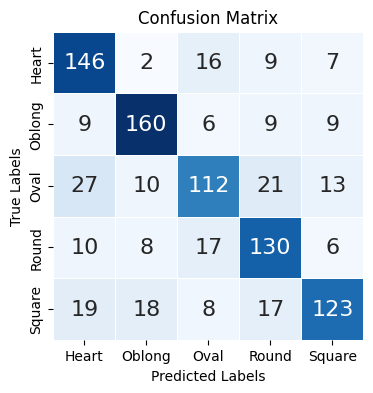

In [ ]:
#@title Support Vector Machine Training
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,f1_score
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
with open('/content/drive/MyDrive/Fds data/X_train equal im.pkl','rb') as f:
  X_train=pickle.load(f)
with open('/content/drive/MyDrive/Fds data/y_train equal im.pkl','rb') as f:
  y_train=pickle.load(f)
with open('/content/drive/MyDrive/Fds data/X_test equal im.pkl','rb') as f:
  X_test=pickle.load(f)
with open('/content/drive/MyDrive/Fds data/y_test equal im.pkl','rb') as f:
  y_test=pickle.load(f)
# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)
filename = 'svm_model.sav'
pickle.dump(svm_classifier, open(filename, 'wb'))
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
print(f'Accuracy : {accuracy}')
print(f'Weighted F1 Score : {f1}')
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(4, 4))
labels=['Heart','Oblong','Oval','Round','Square']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, linewidths=.5,xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/50
109/109 [==============================] - 1s 4ms/step - loss: 1.4268 - accuracy: 0.4141
Epoch 2/50
109/109 [==============================] - 0s 4ms/step - loss: 0.9778 - accuracy: 0.6368
Epoch 3/50
109/109 [==============================] - 0s 4ms/step - loss: 0.8094 - accuracy: 0.7160
Epoch 4/50
109/109 [==============================] - 0s 4ms/step - loss: 0.7157 - accuracy: 0.7563
Epoch 5/50
109/109 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.7761
Epoch 6/50
109/109 [==============================] - 0s 4ms/step - loss: 0.6002 - accuracy: 0.7951
Epoch 7/50
109/109 [==============================] - 1s 9ms/step - loss: 0.5400 - accuracy: 0.8127
Epoch 8/50
109/109 [==============================] - 1s 5ms/step - loss: 0.5153 - accuracy: 0.8299
Epoch 9/50
109/109 [==============================] - 0s 4ms/step - loss: 0.4940 - accuracy: 0.8400
Epoch 10/50
109/109 [==============================] - 0s 4ms/step - loss: 0.4560 - accuracy: 0.8460

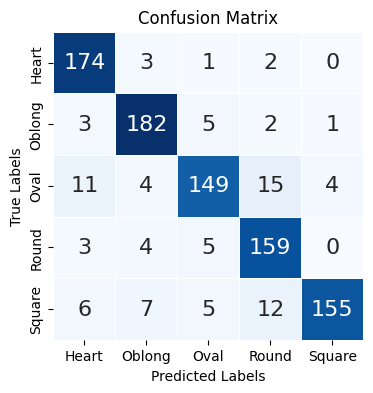

In [ ]:
#@title Neural Network
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,f1_score
from keras.layers import Dense, Dropout
import pickle
# Assuming you have X_train, y_train, X_test, y_test
# Replace them with your actual data
with open('/content/drive/MyDrive/Fds data/X_train equal im.pkl','rb') as f:
  X_train=pickle.load(f)
with open('/content/drive/MyDrive/Fds data/y_train equal im.pkl','rb') as f:
  y_train=pickle.load(f)
with open('/content/drive/MyDrive/Fds data/X_test equal im.pkl','rb') as f:
  X_test=pickle.load(f)
with open('/content/drive/MyDrive/Fds data/y_test equal im.pkl','rb') as f:
  y_test=pickle.load(f)
# Convert labels to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
#y_test_encoded = label_encoder.transform(y_test)

# Define the neural network model
# Define a deeper neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=50, batch_size=32)
filename = 'nn_model.sav'
pickle.dump(model, open(filename, 'wb'))
# Evaluate the model on the test set
y_pred_probs = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_probs, axis=1)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
print(f'Accuracy : {accuracy}')
print(f'Weighted F1 Score : {f1}')
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(4, 4))
labels=['Heart','Oblong','Oval','Round','Square']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, linewidths=.5,xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy : 0.9122807017543859
Weighted F1 Score : 0.9121793699531775


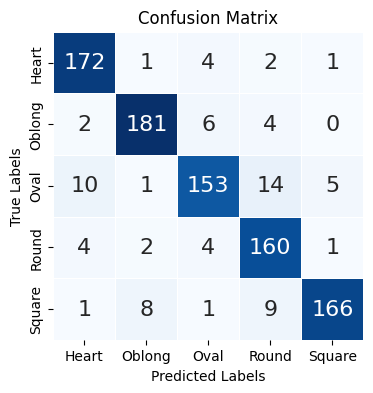

In [ ]:
#@title Random Forest Training
# acc must be around 0.9122807017543859
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
with open('/content/drive/MyDrive/Fds data/X_train equal im.pkl','rb') as f:
  X_train=pickle.load(f)
with open('/content/drive/MyDrive/Fds data/y_train equal im.pkl','rb') as f:
  y_train=pickle.load(f)
with open('/content/drive/MyDrive/Fds data/X_test equal im.pkl','rb') as f:
  X_test=pickle.load(f)
with open('/content/drive/MyDrive/Fds data/y_test equal im.pkl','rb') as f:
  y_test=pickle.load(f)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))
y_pred=rf.predict(X_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
print(f'Accuracy : {acc}')
print(f'Weighted F1 Score : {f1}')
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(4, 4))
labels=['Heart','Oblong','Oval','Round','Square']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16}, linewidths=.5,xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 2s 2s/step
Random Forest

1/1 [==============================] - 0s 69ms/step

Original image


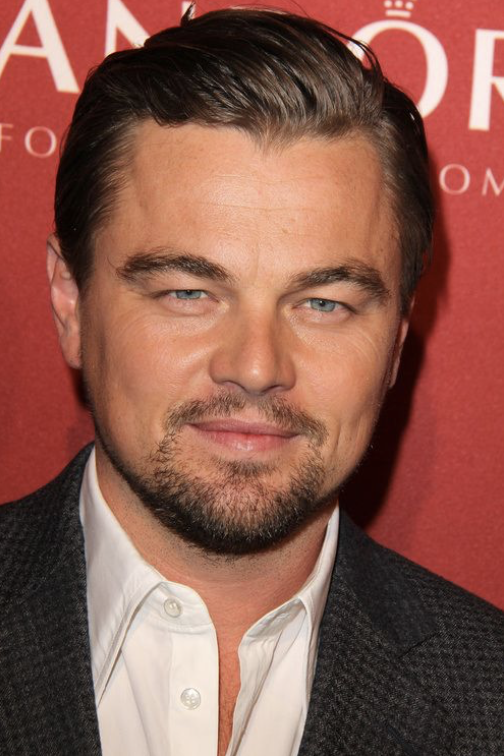


Cropped image


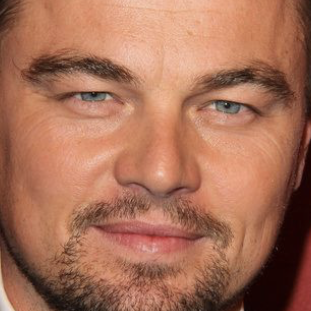



Face shape : Round


In [ ]:
#@title Demo 1
import cv2
import dlib
import numpy as np
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
impath = '/content/drive/MyDrive/Samples for demo /Sample 1 round.png'
image = cv2.imread(impath)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #Convert the Image to Grayscale
# Create the Dlib frontal face detector
detector = dlib.get_frontal_face_detector()
#cv2_imshow(image)
    # Detect faces in the image
faces = detector(image)
    # Check if any faces were detected
if faces:
        # Assume only one face in the image, you may need to modify this for your specific case
  x, y, width, height = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()

        # Adjust the y coordinate for cropping to capture the entire face
  img_rgb = cv2.imread(impath)  #Displaying the Image
  cropped_image = img_rgb[y:y+height, x:x+width]
  #cropped_image=cv2.resize(cropped_image,(image.shape[0],image.shape[1]))
  #concatenated_img = cv2.hconcat([image, cropped_image])
  embedding = get_face_embedding(image)
  print('Random Forest\n')
  rf=pickle.load(open('/content/drive/MyDrive/Fds data/rf_model.pkl', 'rb'))
  shape = rf.predict(embedding)
  print('\nOriginal image')
  cv2_imshow(image)
  print('\nCropped image')
  cv2_imshow(cropped_image)
  probabilities = np.array(shape)

# Find the index of the maximum probability
  predicted_index = np.argmax(probabilities)

# Define your face shape labels
  face_shape_labels = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']

# Get the predicted face shape label
  shape = face_shape_labels[predicted_index]
  print(f'\n\nFace shape : {shape}')
else:
  print("No face detected in the image.")

For Round Face shaped people, the following types will be good.

1.Oversized


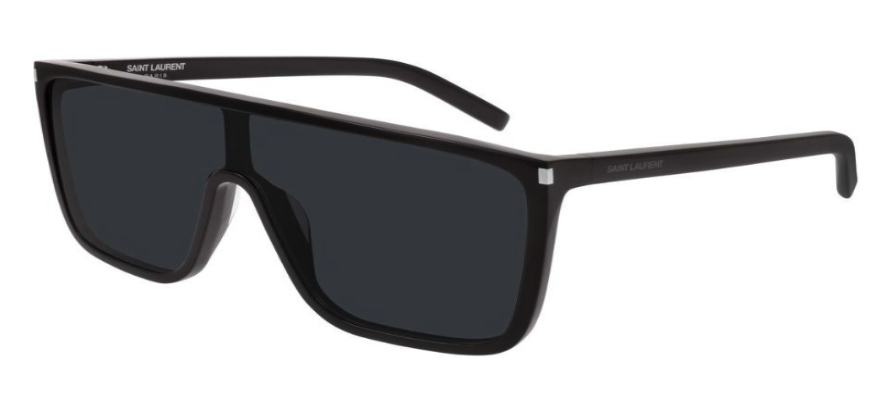

2.Rectangle


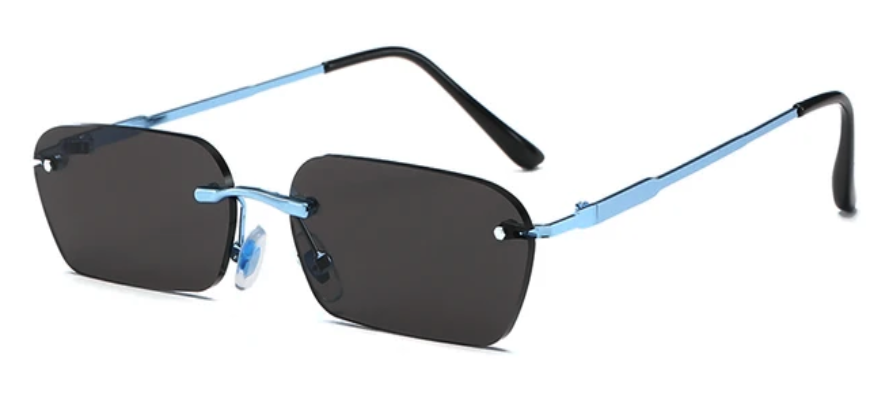

In [ ]:
#@title Sunglass recommendation
from google.colab.patches import cv2_imshow
# List of recommended sunglasses image URLs or file paths
sunglasses_images = [
    "/content/drive/MyDrive/Sunglass types/Aviator-Heart.png",
    "/content/drive/MyDrive/Sunglass types/Browline-Oval.png",
    "/content/drive/MyDrive/Sunglass types/Cateye-Square.png",
    '/content/drive/MyDrive/Sunglass types/Hexa-Rectangle.png',
    '/content/drive/MyDrive/Sunglass types/Oversized-Round.png',
    '/content/drive/MyDrive/Sunglass types/Round-Oval.png',
    '/content/drive/MyDrive/Sunglass types/Square-Rectangle.png',
    '/content/drive/MyDrive/Sunglass types/Wayfarer-Heart.png',
    '/content/drive/MyDrive/Sunglass types/Wraparound-Square.png',
    '/content/drive/MyDrive/Sunglass types/Rectangle-Round.png'
    # Add more sunglasses images here
]
def give_recommendation(face_shape):
  if face_shape=='Heart':
    print('For Heart Face shaped people, the following types will be good.\n')
    print('1.Aviator')
    original_image = cv2.imread(sunglasses_images[0])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Wayfarer')
    original_image = cv2.imread(sunglasses_images[7])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Oval':
    print('For Oval Face shaped people, the following types will be good.\n')
    print('1.Browline')
    original_image = cv2.imread(sunglasses_images[1])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Round')
    original_image = cv2.imread(sunglasses_images[5])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Square':
    print('For Square Face shaped people, the following types will be good.\n')
    print('1.Cateye')
    original_image = cv2.imread(sunglasses_images[2])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Wraparound')
    original_image = cv2.imread(sunglasses_images[8])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Oblong':
    print('For Oblong Face shaped people, the following types will be good.\n')
    print('1.Square')
    original_image = cv2.imread(sunglasses_images[6])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Hexagonal')
    original_image = cv2.imread(sunglasses_images[3])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Round':
    print('For Round Face shaped people, the following types will be good.\n')
    print('1.Oversized')
    original_image = cv2.imread(sunglasses_images[4])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Rectangle')
    original_image = cv2.imread(sunglasses_images[9])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

give_recommendation(shape)

1/1 [==============================] - 2s 2s/step
Random Forest

1/1 [==============================] - 0s 76ms/step

Original image


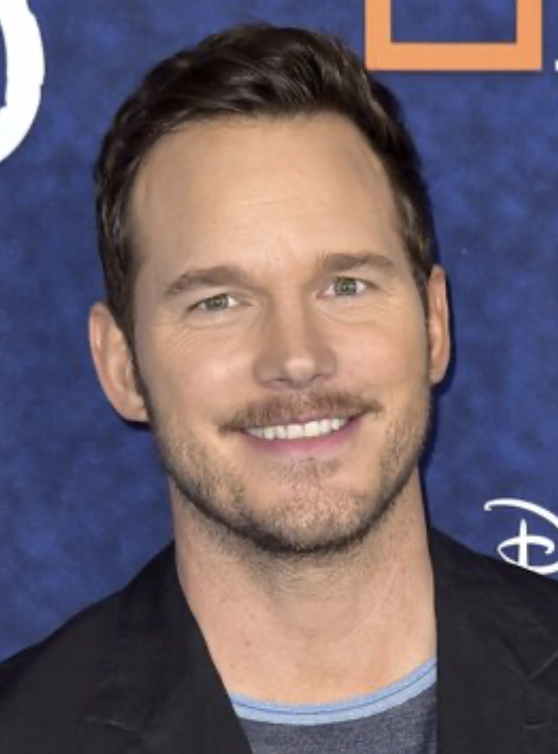


Cropped image


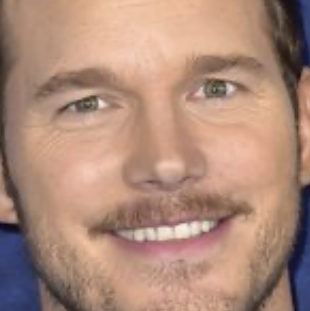



Face shape : Oblong


In [ ]:
#@title Demo 2
import cv2
import dlib
import numpy as np

from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
impath = '/content/drive/MyDrive/Samples for demo /Sample 2 oblong.png'
image = cv2.imread(impath)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #Convert the Image to Grayscale
# Create the Dlib frontal face detector
detector = dlib.get_frontal_face_detector()
#cv2_imshow(image)
    # Detect faces in the image
faces = detector(image)
    # Check if any faces were detected
if faces:
        # Assume only one face in the image, you may need to modify this for your specific case
  x, y, width, height = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()

        # Adjust the y coordinate for cropping to capture the entire face
  img_rgb = cv2.imread(impath)  #Displaying the Image
  cropped_image = img_rgb[y:y+height, x:x+width]
  #cropped_image=cv2.resize(cropped_image,(image.shape[0],image.shape[1]))
  #concatenated_img = cv2.hconcat([image, cropped_image])
  embedding = get_face_embedding(image)
  print('Random Forest\n')
  rf=pickle.load(open('/content/drive/MyDrive/Fds data/rf_model.pkl', 'rb'))
  shape = rf.predict(embedding)
  print('\nOriginal image')
  cv2_imshow(image)
  print('\nCropped image')
  cv2_imshow(cropped_image)
  probabilities = np.array(shape)

# Find the index of the maximum probability
  predicted_index = np.argmax(probabilities)

# Define your face shape labels
  face_shape_labels = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']

# Get the predicted face shape label
  shape = face_shape_labels[predicted_index]
  print(f'\n\nFace shape : {shape}')
else:
  print("No face detected in the image.")

For Oblong Face shaped people, the following types will be good.

1.Square


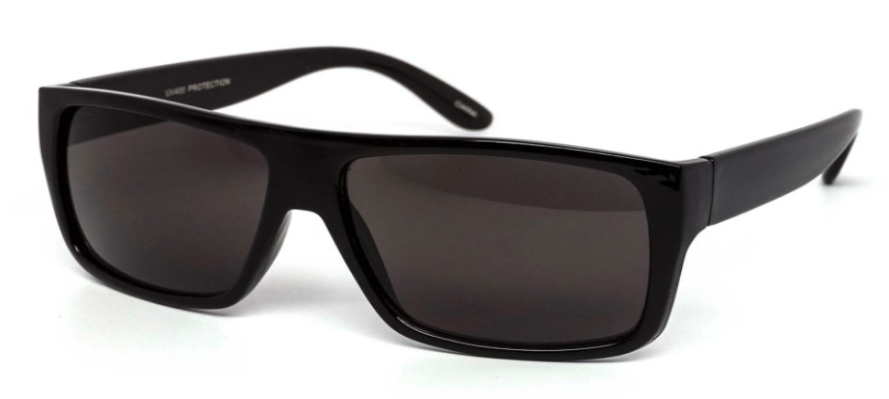

2.Hexagonal


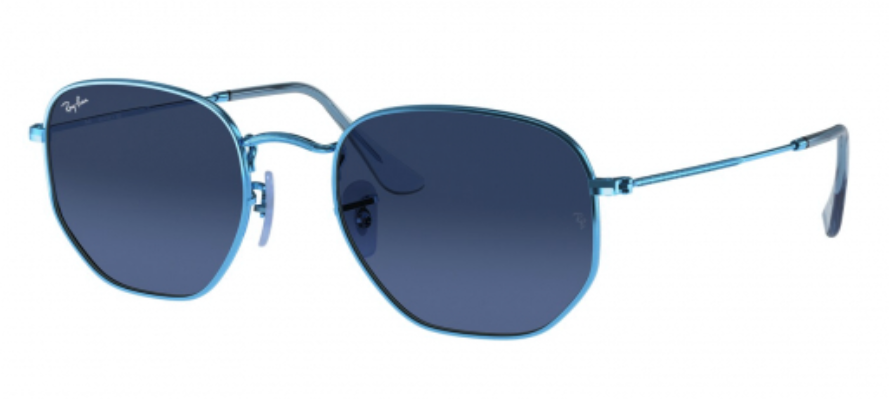

In [ ]:
#@title Sunglass recommendation
from google.colab.patches import cv2_imshow
# List of recommended sunglasses image URLs or file paths
sunglasses_images = [
    "/content/drive/MyDrive/Sunglass types/Aviator-Heart.png",
    "/content/drive/MyDrive/Sunglass types/Browline-Oval.png",
    "/content/drive/MyDrive/Sunglass types/Cateye-Square.png",
    '/content/drive/MyDrive/Sunglass types/Hexa-Rectangle.png',
    '/content/drive/MyDrive/Sunglass types/Oversized-Round.png',
    '/content/drive/MyDrive/Sunglass types/Round-Oval.png',
    '/content/drive/MyDrive/Sunglass types/Square-Rectangle.png',
    '/content/drive/MyDrive/Sunglass types/Wayfarer-Heart.png',
    '/content/drive/MyDrive/Sunglass types/Wraparound-Square.png',
    '/content/drive/MyDrive/Sunglass types/Rectangle-Round.png'
    # Add more sunglasses images here
]
def give_recommendation(face_shape):
  if face_shape=='Heart':
    print('For Heart Face shaped people, the following types will be good.\n')
    print('1.Aviator')
    original_image = cv2.imread(sunglasses_images[0])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Wayfarer')
    original_image = cv2.imread(sunglasses_images[7])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Oval':
    print('For Oval Face shaped people, the following types will be good.\n')
    print('1.Browline')
    original_image = cv2.imread(sunglasses_images[1])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Round')
    original_image = cv2.imread(sunglasses_images[5])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Square':
    print('For Square Face shaped people, the following types will be good.\n')
    print('1.Cateye')
    original_image = cv2.imread(sunglasses_images[2])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Wraparound')
    original_image = cv2.imread(sunglasses_images[8])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Oblong':
    print('For Oblong Face shaped people, the following types will be good.\n')
    print('1.Square')
    original_image = cv2.imread(sunglasses_images[6])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Hexagonal')
    original_image = cv2.imread(sunglasses_images[3])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Round':
    print('For Round Face shaped people, the following types will be good.\n')
    print('1.Oversized')
    original_image = cv2.imread(sunglasses_images[4])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Rectangle')
    original_image = cv2.imread(sunglasses_images[9])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

give_recommendation(shape)

1/1 [==============================] - 2s 2s/step
Random Forest

1/1 [==============================] - 0s 71ms/step

Original image


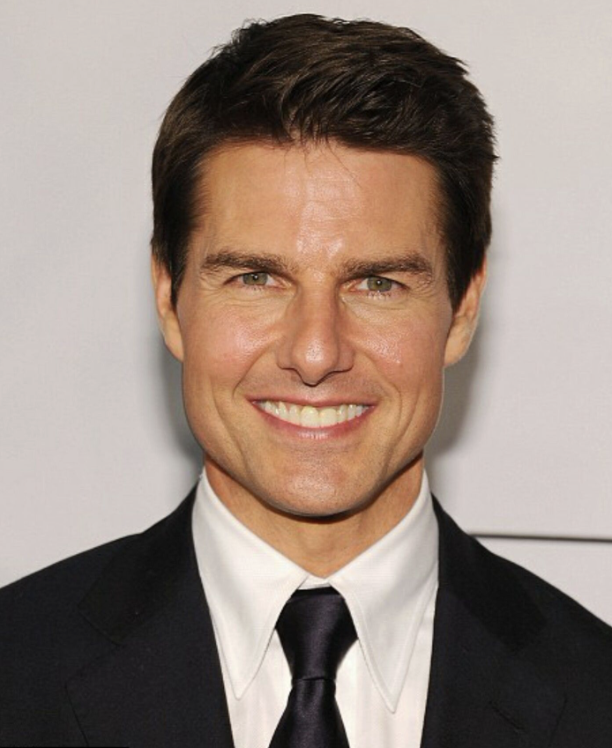


Cropped image


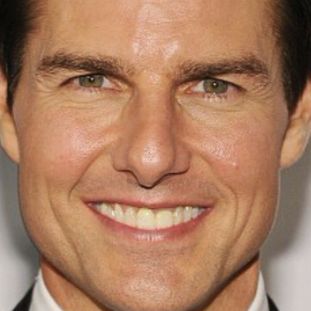



Face shape : Square


In [ ]:
#@title Demo 3
import cv2
import dlib
import numpy as np

from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
impath = '/content/drive/MyDrive/Samples for demo /Sample 3 square.png'
image = cv2.imread(impath)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #Convert the Image to Grayscale
# Create the Dlib frontal face detector
detector = dlib.get_frontal_face_detector()
#cv2_imshow(image)
    # Detect faces in the image
faces = detector(image)
    # Check if any faces were detected
if faces:
        # Assume only one face in the image, you may need to modify this for your specific case
  x, y, width, height = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()

        # Adjust the y coordinate for cropping to capture the entire face
  img_rgb = cv2.imread(impath)  #Displaying the Image
  cropped_image = img_rgb[y:y+height, x:x+width]
  #cropped_image=cv2.resize(cropped_image,(image.shape[0],image.shape[1]))
  #concatenated_img = cv2.hconcat([image, cropped_image])
  embedding = get_face_embedding(image)
  print('Random Forest\n')
  rf=pickle.load(open('/content/drive/MyDrive/Fds data/rf_model.pkl', 'rb'))
  shape = rf.predict(embedding)
  print('\nOriginal image')
  cv2_imshow(image)
  print('\nCropped image')
  cv2_imshow(cropped_image)
  probabilities = np.array(shape)

# Find the index of the maximum probability
  predicted_index = np.argmax(probabilities)

# Define your face shape labels
  face_shape_labels = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']

# Get the predicted face shape label
  shape = face_shape_labels[predicted_index]
  print(f'\n\nFace shape : {shape}')
else:
  print("No face detected in the image.")

For Square Face shaped people, the following types will be good.

1.Cateye


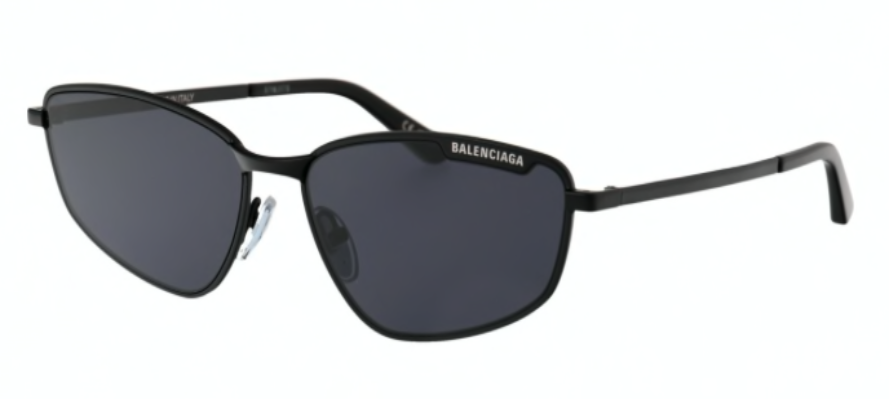

2.Wraparound


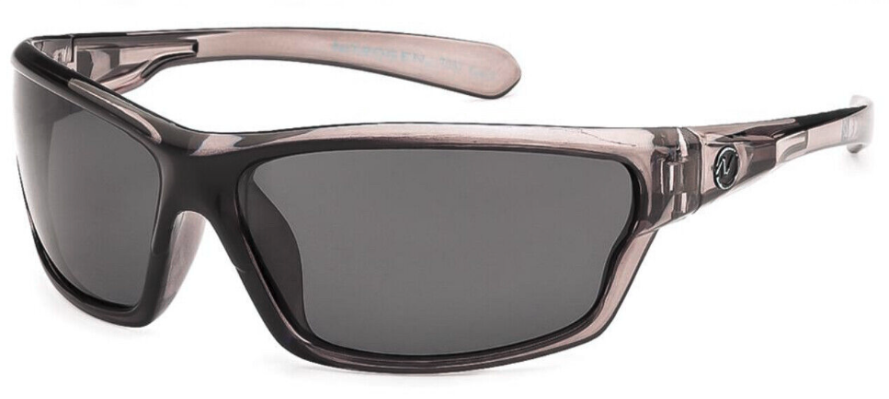

In [ ]:
#@title Sunglass recommendation
from google.colab.patches import cv2_imshow
# List of recommended sunglasses image URLs or file paths
sunglasses_images = [
    "/content/drive/MyDrive/Sunglass types/Aviator-Heart.png",
    "/content/drive/MyDrive/Sunglass types/Browline-Oval.png",
    "/content/drive/MyDrive/Sunglass types/Cateye-Square.png",
    '/content/drive/MyDrive/Sunglass types/Hexa-Rectangle.png',
    '/content/drive/MyDrive/Sunglass types/Oversized-Round.png',
    '/content/drive/MyDrive/Sunglass types/Round-Oval.png',
    '/content/drive/MyDrive/Sunglass types/Square-Rectangle.png',
    '/content/drive/MyDrive/Sunglass types/Wayfarer-Heart.png',
    '/content/drive/MyDrive/Sunglass types/Wraparound-Square.png',
    '/content/drive/MyDrive/Sunglass types/Rectangle-Round.png'
    # Add more sunglasses images here
]
def give_recommendation(face_shape):
  if face_shape=='Heart':
    print('For Heart Face shaped people, the following types will be good.\n')
    print('1.Aviator')
    original_image = cv2.imread(sunglasses_images[0])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Wayfarer')
    original_image = cv2.imread(sunglasses_images[7])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Oval':
    print('For Oval Face shaped people, the following types will be good.\n')
    print('1.Browline')
    original_image = cv2.imread(sunglasses_images[1])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Round')
    original_image = cv2.imread(sunglasses_images[5])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Square':
    print('For Square Face shaped people, the following types will be good.\n')
    print('1.Cateye')
    original_image = cv2.imread(sunglasses_images[2])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Wraparound')
    original_image = cv2.imread(sunglasses_images[8])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Oblong':
    print('For Oblong Face shaped people, the following types will be good.\n')
    print('1.Square')
    original_image = cv2.imread(sunglasses_images[6])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Hexagonal')
    original_image = cv2.imread(sunglasses_images[3])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Round':
    print('For Round Face shaped people, the following types will be good.\n')
    print('1.Oversized')
    original_image = cv2.imread(sunglasses_images[4])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Rectangle')
    original_image = cv2.imread(sunglasses_images[9])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

give_recommendation(shape)

1/1 [==============================] - 3s 3s/step
Random Forest

1/1 [==============================] - 0s 69ms/step

Original image


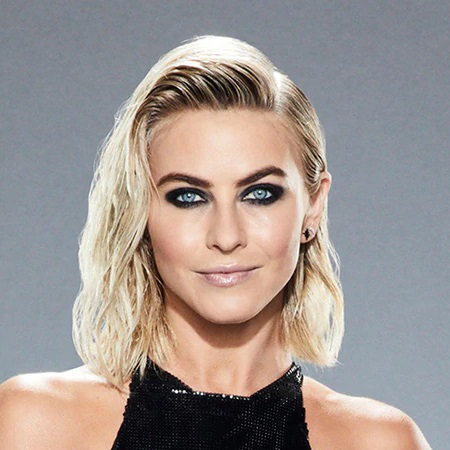


Cropped image


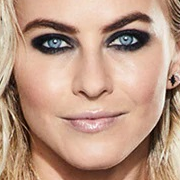



Face shape : Oval


In [ ]:
#@title Demo 4
import cv2
import dlib
import numpy as np

from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
impath = '/content/drive/MyDrive/Samples for demo /Sample 4 oval.jpg'
image = cv2.imread(impath)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #Convert the Image to Grayscale
# Create the Dlib frontal face detector
detector = dlib.get_frontal_face_detector()
#cv2_imshow(image)
    # Detect faces in the image
faces = detector(image)
    # Check if any faces were detected
if faces:
        # Assume only one face in the image, you may need to modify this for your specific case
  x, y, width, height = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()

        # Adjust the y coordinate for cropping to capture the entire face
  img_rgb = cv2.imread(impath)  #Displaying the Image
  cropped_image = img_rgb[y:y+height, x:x+width]
  #cropped_image=cv2.resize(cropped_image,(image.shape[0],image.shape[1]))
  #concatenated_img = cv2.hconcat([image, cropped_image])
  embedding = get_face_embedding(image)
  print('Random Forest\n')
  rf=pickle.load(open('/content/drive/MyDrive/Fds data/rf_model.pkl', 'rb'))
  shape = rf.predict(embedding)
  print('\nOriginal image')
  cv2_imshow(image)
  print('\nCropped image')
  cv2_imshow(cropped_image)
  probabilities = np.array(shape)

# Find the index of the maximum probability
  predicted_index = np.argmax(probabilities)

# Define your face shape labels
  face_shape_labels = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']

# Get the predicted face shape label
  shape = face_shape_labels[predicted_index]
  print(f'\n\nFace shape : {shape}')
else:
  print("No face detected in the image.")

For Oval Face shaped people, the following types will be good.

1.Browline


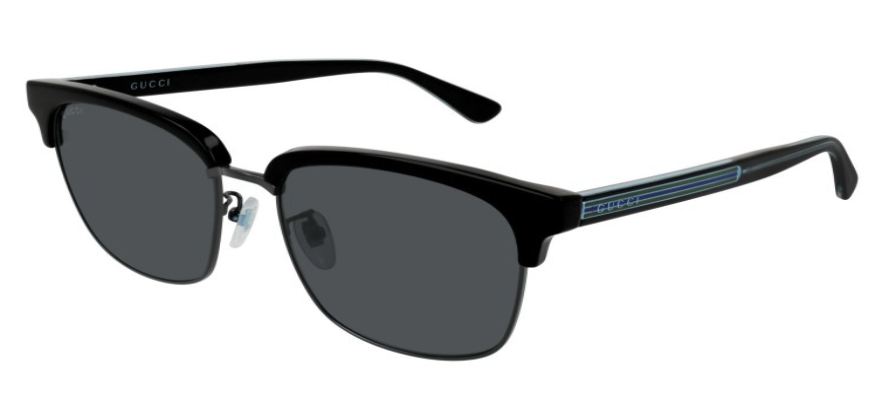

2.Round


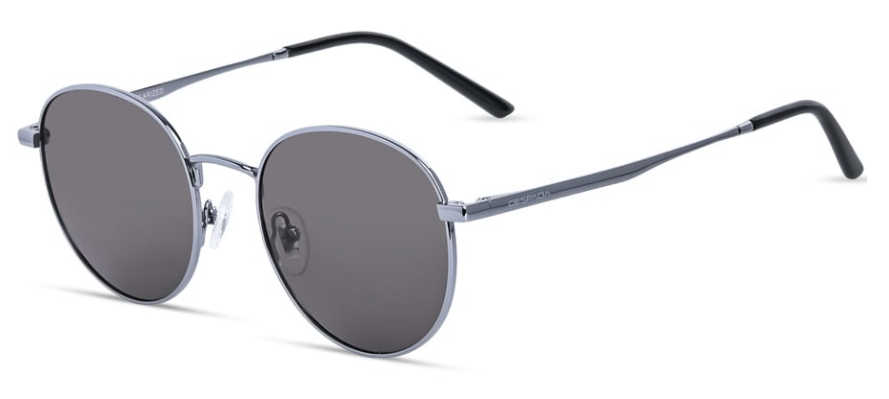

In [ ]:
#@title Sunglass recommendation
from google.colab.patches import cv2_imshow
# List of recommended sunglasses image URLs or file paths
sunglasses_images = [
    "/content/drive/MyDrive/Sunglass types/Aviator-Heart.png",
    "/content/drive/MyDrive/Sunglass types/Browline-Oval.png",
    "/content/drive/MyDrive/Sunglass types/Cateye-Square.png",
    '/content/drive/MyDrive/Sunglass types/Hexa-Rectangle.png',
    '/content/drive/MyDrive/Sunglass types/Oversized-Round.png',
    '/content/drive/MyDrive/Sunglass types/Round-Oval.png',
    '/content/drive/MyDrive/Sunglass types/Square-Rectangle.png',
    '/content/drive/MyDrive/Sunglass types/Wayfarer-Heart.png',
    '/content/drive/MyDrive/Sunglass types/Wraparound-Square.png',
    '/content/drive/MyDrive/Sunglass types/Rectangle-Round.png'
    # Add more sunglasses images here
]
def give_recommendation(face_shape):
  if face_shape=='Heart':
    print('For Heart Face shaped people, the following types will be good.\n')
    print('1.Aviator')
    original_image = cv2.imread(sunglasses_images[0])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Wayfarer')
    original_image = cv2.imread(sunglasses_images[7])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Oval':
    print('For Oval Face shaped people, the following types will be good.\n')
    print('1.Browline')
    original_image = cv2.imread(sunglasses_images[1])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Round')
    original_image = cv2.imread(sunglasses_images[5])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Square':
    print('For Square Face shaped people, the following types will be good.\n')
    print('1.Cateye')
    original_image = cv2.imread(sunglasses_images[2])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Wraparound')
    original_image = cv2.imread(sunglasses_images[8])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Oblong':
    print('For Oblong Face shaped people, the following types will be good.\n')
    print('1.Square')
    original_image = cv2.imread(sunglasses_images[6])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Hexagonal')
    original_image = cv2.imread(sunglasses_images[3])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Round':
    print('For Round Face shaped people, the following types will be good.\n')
    print('1.Oversized')
    original_image = cv2.imread(sunglasses_images[4])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Rectangle')
    original_image = cv2.imread(sunglasses_images[9])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

give_recommendation(shape)

1/1 [==============================] - 2s 2s/step
Random Forest

1/1 [==============================] - 0s 68ms/step

Original image


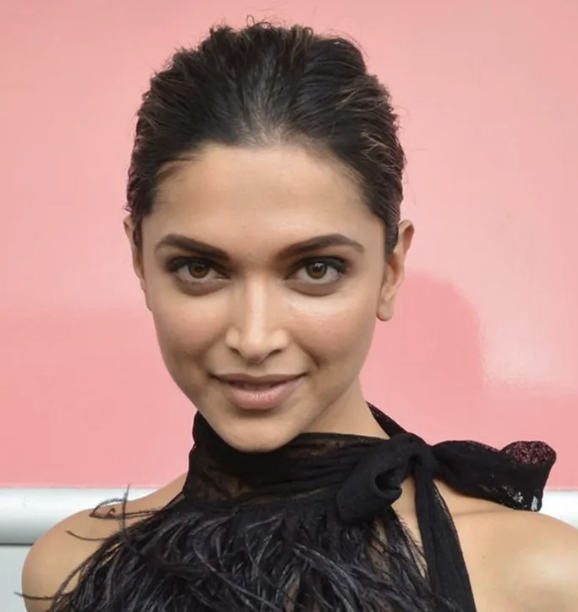


Cropped image


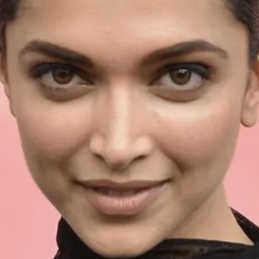



Face shape : Heart


In [ ]:
#@title Demo 5
import cv2
import dlib
import numpy as np
from google.colab.patches import cv2_imshow
impath = '/content/drive/MyDrive/Samples for demo /Sample 5 heart.png'
image = cv2.imread(impath)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #Convert the Image to Grayscale
# Create the Dlib frontal face detector
detector = dlib.get_frontal_face_detector()
#cv2_imshow(image)
    # Detect faces in the image
faces = detector(image)
    # Check if any faces were detected
if faces:
        # Assume only one face in the image, you may need to modify this for your specific case
  x, y, width, height = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()

        # Adjust the y coordinate for cropping to capture the entire face
  img_rgb = cv2.imread(impath)  #Displaying the Image
  cropped_image = img_rgb[y:y+height, x:x+width]
  #cropped_image=cv2.resize(cropped_image,(image.shape[0],image.shape[1]))
  #concatenated_img = cv2.hconcat([image, cropped_image])
  embedding = get_face_embedding(image)
  print('Random Forest\n')
  rf=pickle.load(open('/content/drive/MyDrive/Fds data/rf_model.pkl', 'rb'))
  shape = rf.predict(embedding)
  print('\nOriginal image')
  cv2_imshow(image)
  print('\nCropped image')
  cv2_imshow(cropped_image)
  probabilities = np.array(shape)

# Find the index of the maximum probability
  predicted_index = np.argmax(probabilities)

# Define your face shape labels
  face_shape_labels = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']

# Get the predicted face shape label
  shape = face_shape_labels[predicted_index]
  print(f'\n\nFace shape : {shape}')
else:
  print("No face detected in the image.")

For Heart Face shaped people, the following types will be good.

1.Aviator


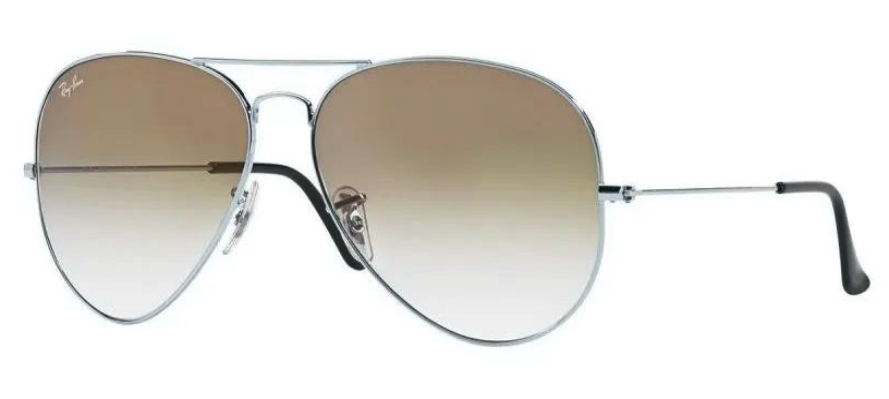

2.Wayfarer


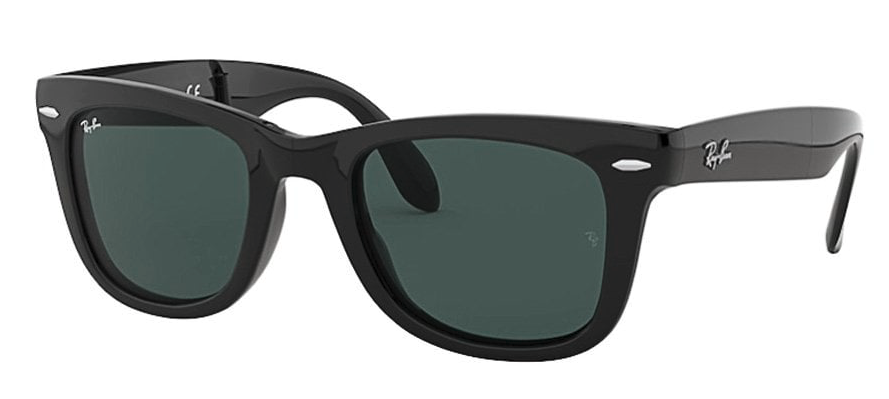

In [ ]:
#@title Sunglass recommendation
from google.colab.patches import cv2_imshow
# List of recommended sunglasses image URLs or file paths
sunglasses_images = [
    "/content/drive/MyDrive/Sunglass types/Aviator-Heart.png",
    "/content/drive/MyDrive/Sunglass types/Browline-Oval.png",
    "/content/drive/MyDrive/Sunglass types/Cateye-Square.png",
    '/content/drive/MyDrive/Sunglass types/Hexa-Rectangle.png',
    '/content/drive/MyDrive/Sunglass types/Oversized-Round.png',
    '/content/drive/MyDrive/Sunglass types/Round-Oval.png',
    '/content/drive/MyDrive/Sunglass types/Square-Rectangle.png',
    '/content/drive/MyDrive/Sunglass types/Wayfarer-Heart.png',
    '/content/drive/MyDrive/Sunglass types/Wraparound-Square.png',
    '/content/drive/MyDrive/Sunglass types/Rectangle-Round.png'
    # Add more sunglasses images here
]
def give_recommendation(face_shape):
  if face_shape=='Heart':
    print('For Heart Face shaped people, the following types will be good.\n')
    print('1.Aviator')
    original_image = cv2.imread(sunglasses_images[0])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Wayfarer')
    original_image = cv2.imread(sunglasses_images[7])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Oval':
    print('For Oval Face shaped people, the following types will be good.\n')
    print('1.Browline')
    original_image = cv2.imread(sunglasses_images[1])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Round')
    original_image = cv2.imread(sunglasses_images[5])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Square':
    print('For Square Face shaped people, the following types will be good.\n')
    print('1.Cateye')
    original_image = cv2.imread(sunglasses_images[2])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Wraparound')
    original_image = cv2.imread(sunglasses_images[8])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Oblong':
    print('For Oblong Face shaped people, the following types will be good.\n')
    print('1.Square')
    original_image = cv2.imread(sunglasses_images[6])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Hexagonal')
    original_image = cv2.imread(sunglasses_images[3])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  elif face_shape=='Round':
    print('For Round Face shaped people, the following types will be good.\n')
    print('1.Oversized')
    original_image = cv2.imread(sunglasses_images[4])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    print('2.Rectangle')
    original_image = cv2.imread(sunglasses_images[9])
    resized_image = cv2.resize(original_image, (889, 399))
    cv2_imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

give_recommendation(shape)